# PageRank

## Introduction

When the Google search engine was launched, one specific algorithm helped it reign supreme and aided in making it one of the most power search engines of its time.

This link analysis algorithm, dubbed PageRank, assigns numerical weighting to elements of a hyper-linked network of web pages. Each page is ranked by evaluating the quality and quantity of its links, and the higher the rank, the more significant the page in the network. The main assumption for this algorithm is that important or relevant websites are more likely to receive links from other websites. By ranking pages based on the number of links to a page, the algorithm is able to provide more relevant websites when a user is searching for something. 

The PageRank algorithm looks at all the links $l_1, \dots, l_k$ pointing to a page $P$, where link $l_i$ starts on a page $P_i$. The page rank is then calculated using the following formula :

####  $r(P) = \sum_{i=1}^k \frac{r(P_i)}{n(P_i)}$

where the Pagerank of the webpage $P_i$ is ${r(P_i)}$ and the number of all links originating from page $P_i$ is ${n(P_i)}$. Each page is given a rank number $0 \leq r(P) \leq 1$, and the sum of all the ranks will equal 1.

I will be making my own PageRank algorithm and ranking the websites of the UB Math Department, which consists of approximately 280 web pages. The goal is to successfully rank the web pages and try to understand why certain web pages are ranked the way they are. For example, I expect that the main homepage of the UB Math department (http://www.buffalo.edu/cas/math.html) will be ranked the highest, as a lot of information and links are provided for undergrad and graduate students on this page.


## Creating PageRank Algorithm 

In [1]:
import requests   
import re

ubm = requests.get('http://www.buffalo.edu/cas/math.html').text #grab all the data from the math website and put it in string

In [2]:
ubm[:1000]  #checking to see what information is stored from grabbing homepage data

'<!DOCTYPE HTML><html lang="en" class="ubcms-65"><!-- cmspub04 0112-211631 --><head><meta http-equiv="X-UA-Compatible" content="IE=edge"/><meta http-equiv="content-type" content="text/html; charset=UTF-8"/><meta id="meta-viewport" name="viewport" content="width=device-width,initial-scale=1"/><script>if (screen.width > 720 && screen.width < 960) document.getElementById(\'meta-viewport\').setAttribute(\'content\',\'width=960\');</script><script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);})(window,document,\'script\',\'dataLayer\',\'GTM-T5KRRKT\');</script><title>Department of Mathematics - Department of Mathematics - University at Buffalo</title><link rel="canonical" href="http://www.buffalo.edu/cas/math.html"/><meta name="date" content="202

Href is an HTML attribute that specifies the URL of the page a link goes to. I will use this to find the relevant links and grab them, as the `ubm` variable contains all the page information for the homepage, and I only want the math department links it contains so I can rank them.

So, I will use `re.findall()` and search for all `href` links that contain `/cas/math` as these links are UB Math Department websites only. 

In [3]:
foo = re.findall(r'href="(/cas/math.+?)"',ubm) #find all (non greedy) instances of '/cas/math' and the following letters
print(foo[:20])                                #store in list foo
len(foo)

['/cas/math.html', '/cas/math/about-us.html', '/cas/math/about-us/why-choose.html', '/cas/math/about-us/our-mission.html', '/cas/math/about-us/our-alumni.html', '/cas/math/about-us/our-alumni/our-alumni.html', '/cas/math/about-us/our-alumni/our-students.html', '/cas/math/about-us/our-alumni/our-faculty.html', '/cas/math/about-us/memberships.html', '/cas/math/about-us/memberships/AMS.html', '/cas/math/about-us/memberships/AWM.html', '/cas/math/about-us/memberships/MSRI.html', '/cas/math/about-us/about-the-university.html', '/cas/math/about-us/the-buffalo-niagara-region.html', '/cas/math/news-events/visiting.html', '/cas/math/about-us/contact-us.html', '/cas/math/people.html', '/cas/math/people/faculty.html', '/cas/math/people/staff_directory.html', '/cas/math/people/emeriti.html']


145

In [4]:
s = set(foo)  #putting into set removes duplicates
len(s)

95

In [5]:
visit = set()                        # create empty set that will be filled with pages we have opened
tovisit = {'/cas/math.html'}         # need tovisit set which contains pages from math homepage
mydict={}                            # empty dictionary 

while len(tovisit)!=0:               # while unchecked pages is not empty, we will continue to check
    link = tovisit.pop()             # grabs random link from set of unchecked page
    page = requests.get('http://www.buffalo.edu'+link).text  # open the page and place information 
    find = re.findall(r'href="(/cas/math.+?)"',page) # find all relevant math links/pages
    visit.add(link)           #we have checked the page so add it to visit
    mydict[link]=find         # add the page we opened and checked as key in dictionary
    for k in find:            # now add each relevent math link we found by opening the page
        tovisit.add(k)
    tovisit=tovisit-visit      #remove checked links from the to visit set

In [6]:
print(mydict['/cas/math.html'][:3]) #confirming that dictionary is correct
len(mydict)

['/cas/math.html', '/cas/math/about-us.html', '/cas/math/about-us/why-choose.html']


281

In [7]:
link2num = {}           #create empty dictionary
n=0                     #create a counter that will be used for indexing
for k in mydict.keys(): #loop over keys in mydict (the links)
    link2num[k]=n       # add values at index n
    n+=1                #index n increases to next value
    
print(link2num['/cas/math.html'])  #since '/cas/math.html' is first link in original dict, it should be first element
len(link2num)

0


281

In [8]:
num2link= {}
for k,v in link2num.items():      #iterate over keys and values in link2num dictionary
    num2link[v]=k                 # add number index as key and links as value
    
print(num2link[0])               #should output /cas/math.html
len(num2link)

/cas/math.html


281

In [9]:
import numpy as np
import matplotlib.pyplot as plt

myarray = np.zeros((len(mydict),len(mydict)))   #fill empty array that is length of mydict by legnth of mydict
for k,v in mydict.items():                      #iterate over keys and values of linked webpages
    i=link2num[k]                               # create row index with index of link2num dictionary
    for a in v:                                 #iterate over linked webpage values
        j=link2num[a]                           #create column index  using index of link2num dictionary
        myarray[i,j]+=1                         #add 1 for every webpage counted at the row and column index of corresponding webpage in the matrix
plt.figure(figsize=(20,15))
plt.imshow(myarray.transpose(),cmap='hot')      #plot transpose just to see what it looks like.
plt.colorbar()
plt.show()

<Figure size 2000x1500 with 2 Axes>

In [10]:
print(len(myarray), myarray[:20])  #checking if myarray makes sense

281 [[2. 1. 1. ... 1. 1. 0.]
 [2. 1. 1. ... 1. 0. 0.]
 [2. 1. 3. ... 1. 0. 0.]
 ...
 [2. 1. 3. ... 1. 0. 0.]
 [2. 1. 3. ... 1. 0. 0.]
 [2. 1. 3. ... 1. 0. 0.]]


In [11]:
a = np.zeros((len(mydict)+1,len(mydict)))      #create a matrix with column same size as dict, for row same size + 1 
a[-1]=1                                        #add 1 at bottom of last row
b = np.zeros(len(mydict)+1)                    #create (282,0) b matrix same are rows of a
b[-1]=1                                        #last element is 1
sumdenom = [sum(x) for x in myarray]           #calcualte total number of pages 
for i in range(len(myarray)):                  #iterate over length of mayarray, this is for rows
    for j in range(len(myarray)):              #iterate over length of mayarray, this is for col
        num = myarray[j,i]                     #get value containing numbers of links for a webpage
        if sumdenom[j]==0:                     # if sum at index=0, then value is 0 for that instance 
            a[i,j] = 0
        else:
            a[i,j] = num/(sumdenom[j])         #divide r(Pi)/n(Pi)
for i in range(len(myarray)):
    a[i,i] -=1                                 #add ones in diagonals to account for adding 1 at the end of matrix

In [12]:
a

array([[-0.9862069 ,  0.02564103,  0.01923077, ...,  0.025     ,
         0.01754386,  0.01980198],
       [ 0.00689655, -0.98717949,  0.00961538, ...,  0.0125    ,
         0.01754386,  0.00990099],
       [ 0.00689655,  0.01282051, -0.97115385, ...,  0.0125    ,
         0.00877193,  0.02970297],
       ...,
       [ 0.00689655,  0.        ,  0.        , ...,  0.        ,
        -0.99122807,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [13]:
x = np.linalg.lstsq(a,b,rcond=None)       #least square of matrix a and b
z = x[0]                                  #grab just the rank
print(z.sum())                            #add all of the ranks together, should equal ~1
print(z[:5], z.shape)                     # check if ranks are calculated, and shape make sense

0.9999999986101004
[0.01899337 0.01122655 0.01348221 0.01334671 0.00069791] (281,)


In [14]:
ranks = {k:z[link2num[k]] for k in mydict.keys()}        #use link2num to attach rank values to respective keys
print(ranks['/cas/math.html'], ranks['/cas/math/people/faculty/simone-cassani.html']) #check to see if dictionary is correct

0.018993374055046013 0.001321994513449917


In [15]:
def second(x): return x[1]          # create function that gives us rank from ranks
listrank = list(ranks.items())      # create list of items in ranks
final_sort = sorted(listrank, key = second, reverse = True) #sort listrank, from highest to lowest
final_sort[:15]

[('/cas/math/about-us/memberships/AWM.html', 0.03570090935369624),
 ('/cas/math/news-events/visiting.html', 0.02460830870696986),
 ('/cas/math/ug/undergraduate-research.html', 0.023016007453772098),
 ('/cas/math/ug/undergraduate-programs.html', 0.02272739822375152),
 ('/cas/math/people/alumni-friends/class-of-2020.html', 0.022626288867442227),
 ('/cas/math/news-events/news.html', 0.02245084731783546),
 ('/cas/math/people/grad-directory.html', 0.021916942116386638),
 ('/cas/math/people/alumni-friends.html', 0.020639029589350703),
 ('/cas/math/grad.html', 0.02018324943766319),
 ('/cas/math.html', 0.018993374055046013),
 ('/cas/math/ug/help-center.html', 0.014353271704738673),
 ('/cas/math/grad/master-program/focus.html', 0.01404984980290577),
 ('/cas/math/ug/honors--awards--and-scholarships.html', 0.013960845371298408),
 ('/cas/math/about-us/contact-us.html', 0.013482213737533486),
 ('/cas/math/about-us/the-buffalo-niagara-region.html', 0.013482213251903566)]

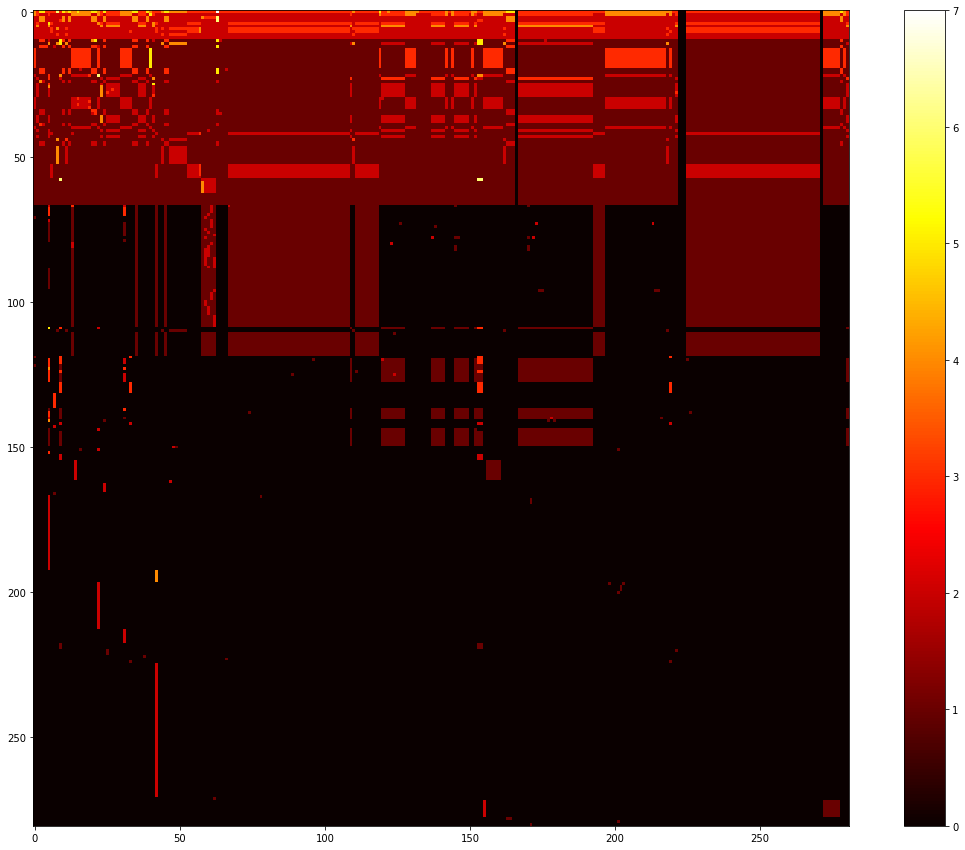

In [16]:
ranklist = []
for x in final_sort:                  #iterate over values in sorted list of ranks and pages
    ranklist.append(x[0])             #append each of the pages based on rank to arbitrary index (0-len(final_sort))

e = np.zeros((len(ranklist),len(ranklist)))   # create empty matrix len(ranklist) x len(ranklist)
for i in range(len(ranklist)):                #iterate over rows
    for j in range(len(ranklist)):            #iterate over col
        row = link2num[ranklist[i]]           #set row equal to ranklist[i] (row)
        col = link2num[ranklist[j]]           #set col equal to ranklist[j] (col)
        e[i,j] = myarray[row,col]             #add corresponding value to matrix e
plt.figure(figsize=(20,15))
plt.imshow(e.transpose(),cmap='hot')          #plot transpose so highest rank is at the top
plt.colorbar()
plt.show()

The graph shows the ranks of the top pages in lighter colors, and pages with lower rank on the bottom with darker colors. The overlapping color shows how these higher ranked pages have more links between than them the lower ranks ones. 

## Observations

In [17]:
final_sort[:10]

[('/cas/math/about-us/memberships/AWM.html', 0.03570090935369624),
 ('/cas/math/news-events/visiting.html', 0.02460830870696986),
 ('/cas/math/ug/undergraduate-research.html', 0.023016007453772098),
 ('/cas/math/ug/undergraduate-programs.html', 0.02272739822375152),
 ('/cas/math/people/alumni-friends/class-of-2020.html', 0.022626288867442227),
 ('/cas/math/news-events/news.html', 0.02245084731783546),
 ('/cas/math/people/grad-directory.html', 0.021916942116386638),
 ('/cas/math/people/alumni-friends.html', 0.020639029589350703),
 ('/cas/math/grad.html', 0.02018324943766319),
 ('/cas/math.html', 0.018993374055046013)]

When taking a look the top 10 pages, a surprising result for me was that `/cas/math.html` was at the bottom of the list. I was expecting it to be the highest rank because it is the homepage that contains all the links, but after some logical thinking it becomes clear that while this is the case,not many websites have links going back to the homepage. After clicking on some of the pages,  I saw that some do not contain any link back to the UBM homepage and send you to a different UB Website.

The highest ranked page is the Association for Women in Mathematics page. After browsing through the page I noticed that the Association hosted lecture series and had multiple events, and I am sure that many other pages probably linked to spread the news about such events and series.I have personally gotten emails about events and things going on about the AWM from  mathematics email chains. It is good to see this page is ranked the highest, as there are fewer women in the Math field than men, and the field is essentially male-dominated. 

The rest of the pages all contain information about undergraduate and graduate programs and activities. There are links to contact members of the math department, directions on how to visit, and news from the Math Department. All of these pages seem pretty useful and information I would expect many would require when on the UBM website. 

In [18]:
final_sort_reversed = sorted(listrank, key = second) #sort listrank, from lowest to highest
final_sort_reversed[:10]

[('/cas/math/news-events/news.host.html/content/shared/cas/math/modules/our-alumni/fatin.detail.html',
  3.882893726395165e-06),
 ('/cas/math/about-us/our-alumni/our-students.host.html/content/shared/cas/math/modules/our-alumni/fatin.detail.html',
  3.906613611699889e-06),
 ('/cas/math/ug/undergraduate-research/summer.host.html/content/shared/cas/math/modules/students2/2017-summer-scholarship.detail.html',
  6.7798341899932835e-06),
 ('/cas/math/about-us/the-buffalo-niagara-region.host.html/content/shared/university/page-content/the-buffalo-niagara-region/things-to-do-in-buffalo/recreation_and_leisure.detail.html',
  7.03177392736426e-06),
 ('/cas/math/about-us/the-buffalo-niagara-region.host.html/content/shared/university/page-content/the-buffalo-niagara-region/things-to-do-in-buffalo/food_and_dining.detail.html',
  7.031773927385944e-06),
 ('/cas/math/about-us/the-buffalo-niagara-region.host.html/content/shared/university/page-content/the-buffalo-niagara-region/things-to-do-in-buffal

When looking at the lowest ranked pages, the opposite is true. The pages contain very specific/niche  information that looks like many pages wouldn't need to link to, such as information on art and culture in Buffalo (something most math students wouldn't need to click on), an Emeriti Faculty member who deals with retired university personnel(again, not something most math website users would need links for), information on a 2017 scholarship (it's 2020), etc. 

## References:

* Code Help from Professor S. Cassani in MTH337
* PageRank information: https://www.link-assistant.com/news/google-page-rank-2019.html
* UBM Homepage : http://www.buffalo.edu/cas/math.html